Bit of work with Nicola's EDR3 catalogue https://arxiv.org/abs/2106.07669

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


In [2]:
tablename = 'gaiaedr3_wd_main.fits'

In [3]:
hdul = fits.open(tablename)
hdul.info()

Filename: gaiaedr3_wd_main.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (116123,)   uint8   
  1  Joined        1 BinTableHDU    660   1280266R x 161C   [23A, K, K, 29A, D, E, D, E, D, E, E, D, D, D, K, K, D, E, D, D, E, D, E, E, E, E, E, E, E, E, E, E, E, I, I, I, I, E, E, E, E, I, L, E, E, E, E, E, E, E, E, I, I, E, I, I, I, E, E, I, I, E, E, E, E, E, E, E, E, E, L, I, D, E, E, E, D, D, D, D, I, D, E, E, E, D, I, D, E, E, E, D, I, I, I, I, I, E, D, D, E, E, E, E, E, I, E, E, E, D, D, D, D, D, I, D, D, D, I, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 19A, I, D, D, D, D, D, D, D, D, D, D, D, J]   


In [4]:
data = hdul[1].data
data.names

['WDJ_name',
 'source_id',
 'dr2_source_id',
 'designation',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'ZP_correction',
 'Pwd',
 'density',
 'solution_id',
 'random_index',
 'ref_epoch',
 'pm',
 'pm_err',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'nu_eff_used_in_astrometry',
 'pseudocolour',
 'pseudocolour_error',
 'ra_pseudocolour_corr',
 'dec_pseudocolour_corr',
 'parallax_pseudocolour_corr',
 'pmra_pseudocolour_corr',
 'pmdec_pseudocolour_corr',
 'astr

In [5]:
tall, Gall = data['Teff_H'], data['phot_g_mean_mag_corrected']

In [6]:
tcut = [25000, 100000]
gcut = 17.1
mask = (tall > tcut[0]) &( tall < tcut[1]) & (Gall < gcut)
t, g = tall[mask], Gall[mask]

/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


1175


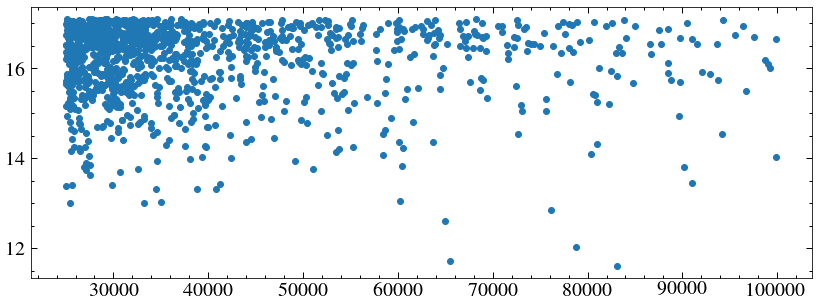

In [7]:
plt.scatter(t, g)
print(len(t))

Text(0, 0.5, '$n$')

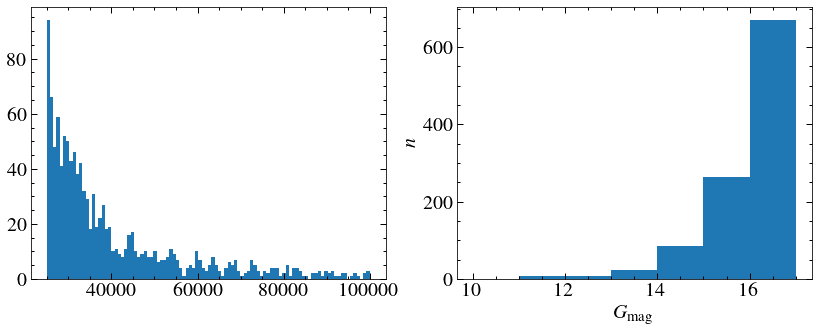

In [8]:
plt.subplot(121)
plt.hist(t, bins=100)
plt.subplot(122)
plt.hist(g, bins=[10, 11, 13, 13, 14, 15, 16, 17])
plt.xlabel('$G_{\mathrm{mag}}$')
plt.ylabel('$n$')


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.8062e+04, 2.4685e+04, 2.4381e+04, 2.2490e+04, 2.3663e+04,
        2.5008e+04, 2.4094e+04, 1.9664e+04, 1.5587e+04, 1.4002e+04,
        1.1600e+04, 9.8410e+03, 8.2370e+03, 7.1780e+03, 6.0350e+03,
        5.1450e+03, 4.2950e+03, 3.6680e+03, 3.2890e+03, 3.0190e+03,
        2.6920e+03, 2.2730e+03, 1.9230e+03, 1.6740e+03, 1.3940e+03,
        1.1050e+03, 9.2000e+02, 7.4600e+02, 5.9400e+02, 5.2300e+02,
        4.3100e+02, 3.8600e+02, 3.4100e+02, 2.4500e+02, 2.3400e+02,
        1.8500e+02, 1.8500e+02, 1.4200e+02, 9.9000e+01, 1.1700e+02,
        8.8000e+01, 9.9000e+01, 6.7000e+01, 5.4000e+01, 7.7000e+01,
        5.2000e+01, 4.6000e+01, 5.3000e+01, 3.9000e+01, 3.2000e+01,
        3.0000e+01, 5.0000e+01, 3.1000e+01, 2.7000e+01, 2.1000e+01,
        2.1000e+01, 2.4000e+01, 2.3000e+01, 2.2000e+01, 2.6000e+01,
        1.9000e+01, 2.3000e+01, 1.8000e+01, 2.0000e+01, 1.3000e+01,
        1.6000e+01, 1.6000e+01, 1.8000e+01, 1.4000e+01, 9.0000e+00,
        1.1000e+01, 1.4000e+01, 1.1000e+01, 5.00

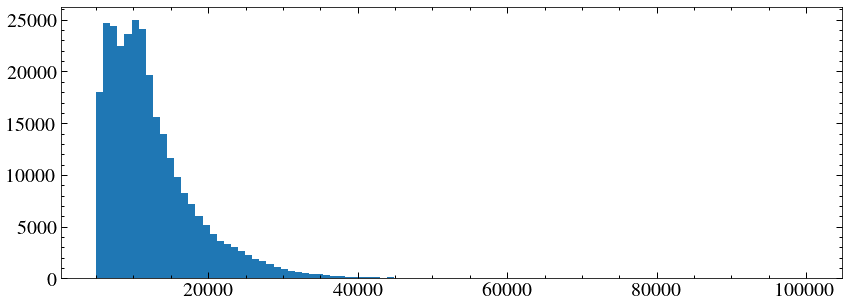

In [9]:
plt.hist(tall, bins=100, range= (5000, 100000))

In [10]:
# plt.figure(figsize=(6,6))
# plt.scatter(tall, data['absG'])
# plt.xlabel('T_e')
# plt.tight_layout()

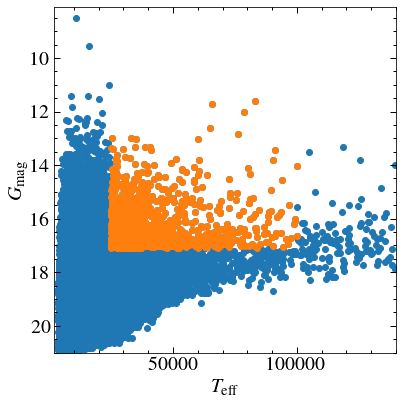

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(tall, Gall)
plt.scatter(t, g)
plt.ylim(21, 8.1)
plt.xlabel('$T_{\mathrm{eff}}$')
plt.ylabel('$G_{\mathrm{mag}}$')
plt.xlim(2000, 140000)
plt.tight_layout()

(array([2.97730e+05, 2.97730e+05, 2.97385e+05, 2.94642e+05, 2.86500e+05,
        2.75221e+05, 2.61221e+05, 2.45851e+05, 2.31004e+05, 2.17204e+05,
        2.03766e+05, 1.89968e+05, 1.75315e+05, 1.60504e+05, 1.45173e+05,
        1.30924e+05, 1.18140e+05, 1.07405e+05, 9.79730e+04, 8.89410e+04,
        8.07560e+04, 7.33820e+04, 6.67240e+04, 6.07670e+04, 5.53370e+04,
        5.04880e+04, 4.60040e+04, 4.19330e+04, 3.82390e+04, 3.49010e+04,
        3.18190e+04, 2.91570e+04, 2.66420e+04, 2.43810e+04, 2.23570e+04,
        2.03630e+04, 1.85270e+04, 1.67680e+04, 1.51350e+04, 1.36720e+04,
        1.22870e+04, 1.10890e+04, 9.97700e+03, 8.97500e+03, 8.03200e+03,
        7.21600e+03, 6.48000e+03, 5.91000e+03, 5.30700e+03, 4.79300e+03,
        4.37900e+03, 3.99600e+03, 3.66100e+03, 3.33500e+03, 3.07100e+03,
        2.81300e+03, 2.58100e+03, 2.34600e+03, 2.13000e+03, 1.95600e+03,
        1.81100e+03, 1.66800e+03, 1.54000e+03, 1.42500e+03, 1.30600e+03,
        1.20800e+03, 1.12000e+03, 1.03700e+03, 9.80

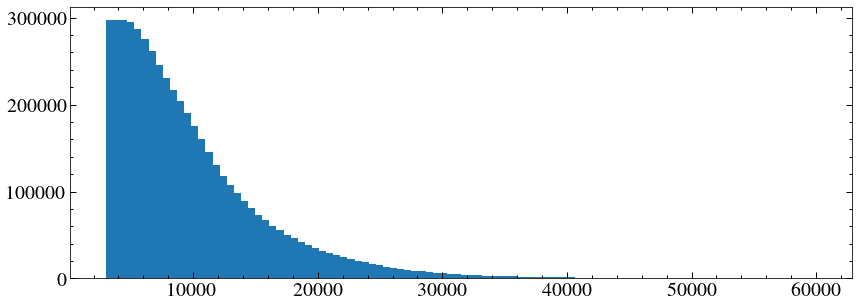

In [12]:
plt.hist(tall, cumulative=-1, bins=100, range=[3000, 60000])

In [13]:
min(tall)

3574.572